In [3]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

In [5]:
dtype = torch.FloatTensor
input_size, hidden_size, output_size = 7, 6, 1
epochs = 300
seq_length = 20
lr = 0.1
data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

In [6]:
w1 = torch.FloatTensor(input_size,
                       hidden_size).type(dtype)
init.normal(w1, 0.0, 0.4)
w1 = Variable(w1, requires_grad=True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad=True)

C:\Users\kulka\AppData\Local\Temp\ipykernel_21732\1045665279.py:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(w1, 0.0, 0.4)
C:\Users\kulka\AppData\Local\Temp\ipykernel_21732\1045665279.py:6: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(w2, 0.0, 0.3)


In [7]:
for i in range(epochs):
   total_loss = 0
   context_state = Variable(torch.zeros(
       (1, hidden_size)).type(dtype), requires_grad=True)
   for j in range(x.size(0)):
      input = x[j:(j+1)]
      target = y[j:(j+1)]
      (pred, context_state) = forward(input, context_state, w1, w2)
      loss = (pred - target).pow(2).sum()/2
      total_loss += loss
      loss.backward()
      w1.data -= lr * w1.grad.data
      w2.data -= lr * w2.grad.data
      w1.grad.data.zero_()
      w2.grad.data.zero_()
      context_state = Variable(context_state.data)
   if i % 10 == 0:
     print('Epoch: {} loss {}'.format(i, total_loss.data))

Epoch: 0 loss 2.4508438110351562
Epoch: 10 loss 0.4404779374599457
Epoch: 20 loss 0.33088013529777527
Epoch: 30 loss 0.2650149166584015
Epoch: 40 loss 0.23196545243263245
Epoch: 50 loss 0.2118174135684967
Epoch: 60 loss 0.19604218006134033
Epoch: 70 loss 0.1808515340089798
Epoch: 80 loss 0.16507741808891296
Epoch: 90 loss 0.14925427734851837
Epoch: 100 loss 0.1350429505109787
Epoch: 110 loss 0.12469843775033951
Epoch: 120 loss 0.12010132521390915
Epoch: 130 loss 0.12115418910980225
Epoch: 140 loss 0.12472347170114517
Epoch: 150 loss 0.12617310881614685
Epoch: 160 loss 0.12253563106060028
Epoch: 170 loss 0.1138114482164383
Epoch: 180 loss 0.10193482041358948
Epoch: 190 loss 0.08933393657207489
Epoch: 200 loss 0.07792723923921585
Epoch: 210 loss 0.06862636655569077
Epoch: 220 loss 0.06143231689929962
Epoch: 230 loss 0.05590561404824257
Epoch: 240 loss 0.05155960097908974
Epoch: 250 loss 0.04801052063703537
Epoch: 260 loss 0.04499022662639618
Epoch: 270 loss 0.04232366755604744
Epoch: 280

In [8]:
context_state = Variable(torch.zeros(
    (1, hidden_size)).type(dtype), requires_grad=False)
predictions = []

for i in range(x.size(0)):
    input = x[i:i+1]
    (pred, context_state) = forward(input, context_state, w1, w2)
    context_state = context_state
    predictions.append(pred.data.numpy().ravel()[0])

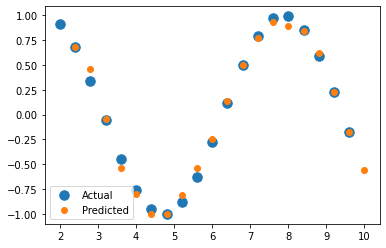

In [9]:
pl.scatter(data_time_steps[:-1], x.data.numpy(), s=90, label="Actual")
pl.scatter(data_time_steps[1:], predictions, label="Predicted")
pl.legend()
pl.show()